**Author:** Elias Rafael Ruiz-Morales

**Institution:** Wellcome Sanger institute

**May, 2022**

Removing maternal contamination and subsetting surgical data


----

# Removing maternal contamination and subsetting surgical data


In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import anndata
import scvi

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = '../results/images/integrated/fetalSurgical_subset/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=200)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
absl                NA
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiw

'/opt/conda/bin/python'

## Loading data

In [3]:
adata=sc.read('../results/scVI/S6_scVIintegrated_adata_latent30_cleanV4_20220523.h5ad')

## ----------


## Removing maternal contamination to keep only fetal cells and maternal M3

In [5]:
#Selecting the cells in the desired clusters
temp_cells = adata[adata.obs['identity'] == 'HB']
temp_cells2= adata[adata.obs['identity'] == 'M3']

temp_cells3= adata[adata.obs['identity'] == 'VCT']
temp_cells4= adata[adata.obs['identity'] == 'EVT']
temp_cells5= adata[adata.obs['identity'] == 'SCT']

temp_cells6= adata[adata.obs['identity'] == 'F1']
temp_cells7= adata[adata.obs['identity'] == 'F2']

temp_cells8= adata[adata.obs['identity'] == 'Endo f']




fetal_adata = temp_cells.concatenate(temp_cells2,temp_cells3,temp_cells4,temp_cells5,temp_cells6,
                                    temp_cells7, temp_cells8, index_unique=None)

... storing 'leiden_scvi' as categorical
... storing 'celltype_predictions' as categorical
... storing 'identity' as categorical


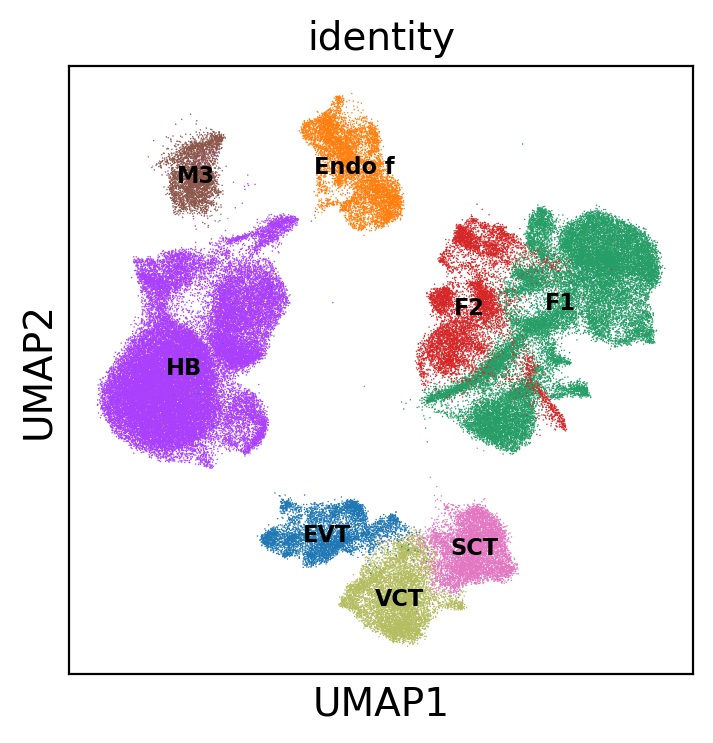

In [6]:
# use scVI imputed values for plottin
sc.pl.umap(fetal_adata, color=['identity' ],legend_fontsize='xx-small',legend_loc= 'on data',
          save='_scVI_latent30_cleanV4_fetal_identity.pdf')

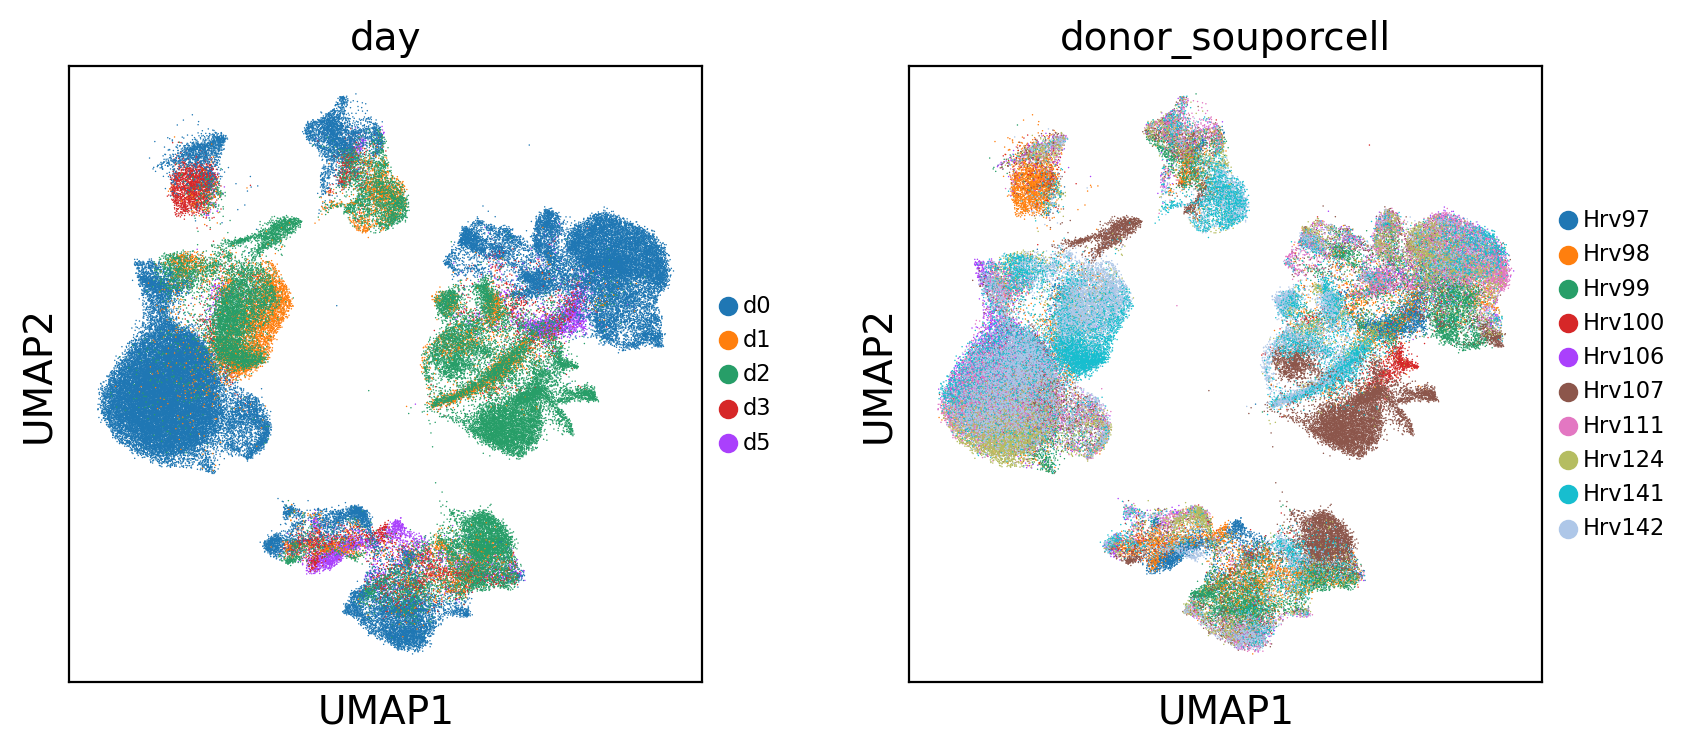

In [7]:
# use scVI imputed values for plottin
sc.pl.umap(fetal_adata, color=['day','donor_souporcell' ],legend_fontsize='xx-small',
           save='_scVI_latent30_cleanV4_fetal_day.pdf')

In [9]:
fetal_adata.write('../results/scVI/S7_scVIintegrated_adata_latent30_cleanV4_fetal_20220523.h5ad')

In [10]:
del(temp_cells,temp_cells2,temp_cells3,temp_cells4,temp_cells5,temp_cells6,temp_cells7,
   temp_cells8)

In [11]:
adata=fetal_adata.copy()

### Selecting only the samples that we've agreed to use for the analysis

In [13]:
samples = list(np.unique(adata.obs['sample']))
samples

['Pla_HDBR10917729',
 'Pla_HDBR10917730',
 'Pla_HDBR10917731',
 'Pla_HDBR10917732',
 'Pla_HDBR10917733',
 'Pla_HDBR10917734',
 'Pla_HDBR11345027',
 'Pla_HDBR11345028',
 'Pla_HDBR11345030',
 'Pla_HDBR11345031',
 'Pla_HDBR11345032',
 'Pla_HDBR11345033',
 'Pla_HDBR12808826',
 'Pla_HDBR12808827',
 'Pla_HDBR12808829',
 'Pla_HDBR12808831']

In [14]:
#defining the samples that i wanna keep
donor_subset=['Pla_HDBR10917730','Pla_HDBR10917732',
              'Pla_HDBR10917733','Pla_HDBR10917734',
              'Pla_HDBR11345028','Pla_HDBR11345030',
              'Pla_HDBR11345032','Pla_HDBR11345033',
              'Pla_HDBR12808826','Pla_HDBR12808827','Pla_HDBR12808829','Pla_HDBR12808831']
 
# list of all donors in our data set
donors= list(set(adata.obs['sample']))

In [15]:
#Deleting all the donors that are not in my donor subset list
for donor in donors:
    if donor not in donor_subset:     
        adata=adata[adata.obs['sample'] != donor]

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


NOTE:

The sample Pla_HDBR10917732 had two donors multiplexed. Therefore, I will also delete the cells corresponding to the donor Hrv99

In [16]:
adata=adata[adata.obs['donor_souporcell'] != 'Hrv99']

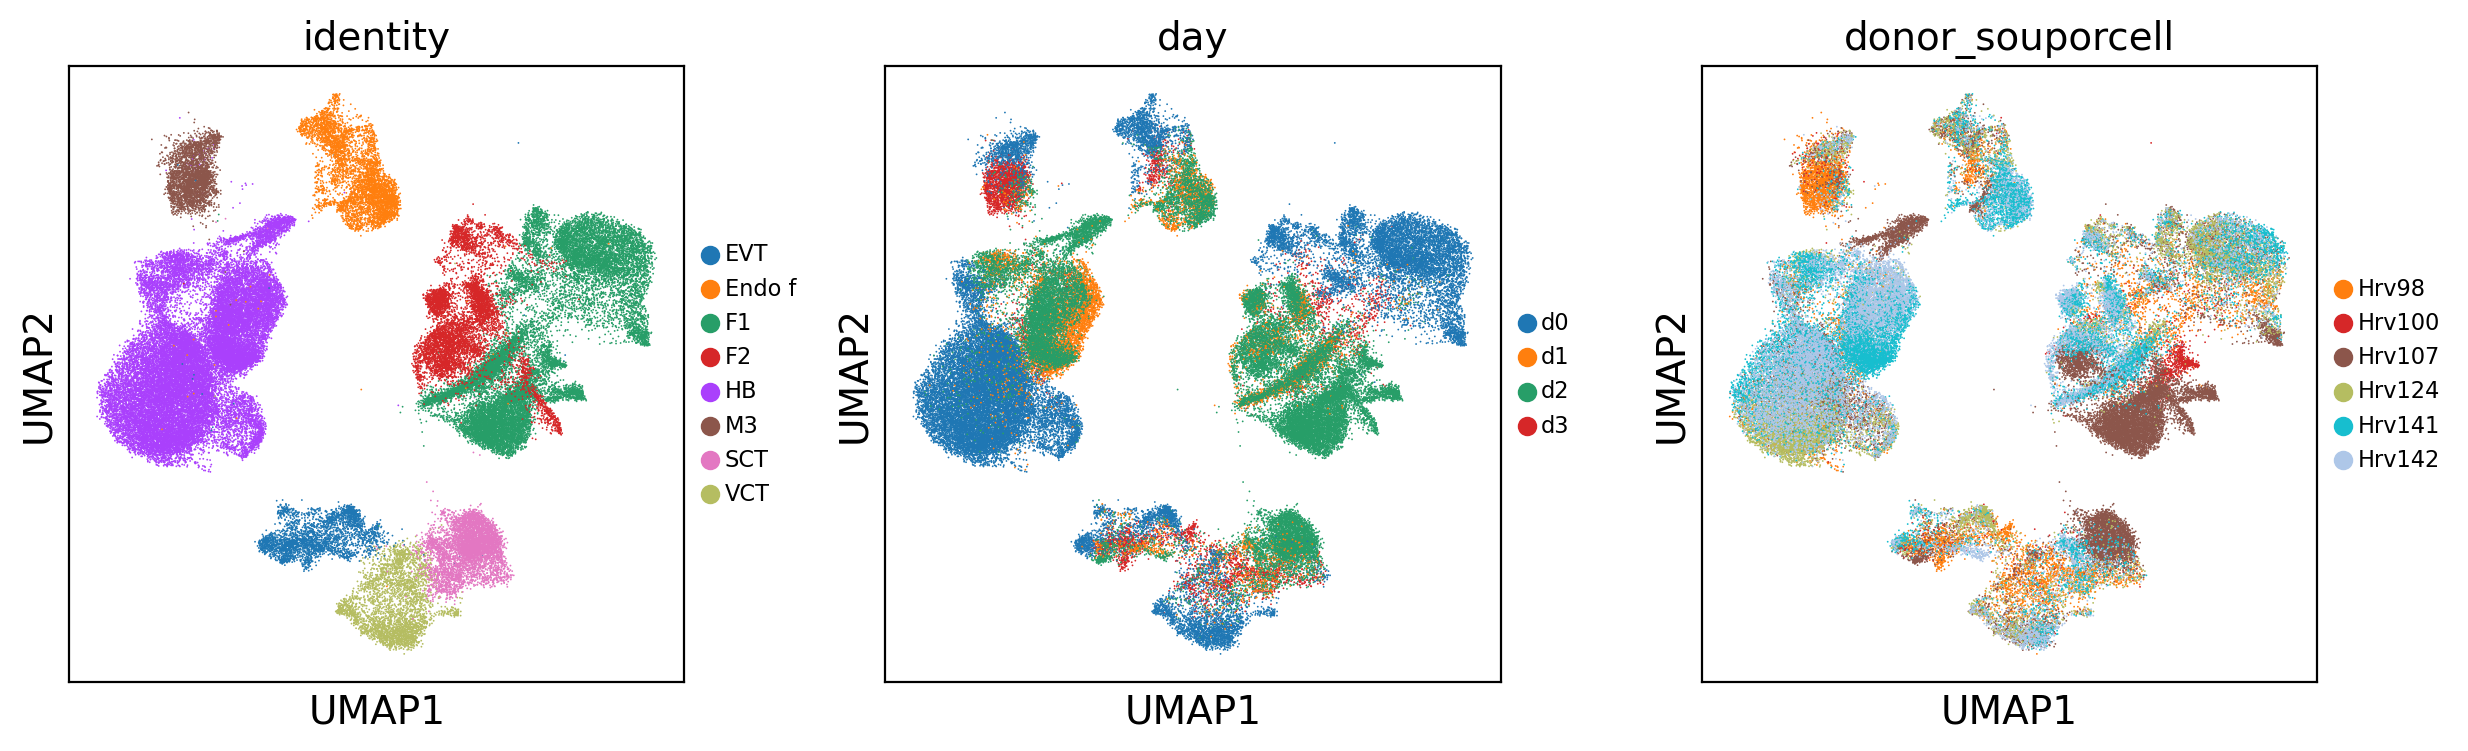

In [18]:
sc.pl.umap(adata, color=['identity','day','donor_souporcell' ],legend_fontsize='xx-small')

In [20]:
adata.write('../results/scVI/S7_scVIintegrated_adata_latent30_cleanV4_fetalSurgical_20220523.h5ad')

In [3]:
adata=sc.read('../results/scVI/S7_scVIintegrated_adata_latent30_cleanV4_fetalSurgical_20220523.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 72027 × 32743
    obs: 'sample', 'donor', 'termination', 'day', 'pcw', 'percent_mito', 'n_counts', 'batch', 'n_genes', 'sample_barcode', 'souporcell_id', 'donor_deconv', 'donor_souporcell', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'scrublet_doublet', 'leiden_scvi', 'celltype_predictions', 'probabilities', 'souporcell_MFgenotype', 'identity', 'souporcell_MFidentity'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'day_colors', 'donor_souporcell_colors', 'identity_colors'
    obsm: 'X_scVI_n_latent_10', 'X_scVI_n_latent_20', 'X_scVI_n_latent_30', 'X_scVI_n_latent_40', 'X_umap', '_scvi_extra_categoricals'
    layers: 'raw_counts'

#### NOTE: 
    
    I end up with 72027 coming only from a fetal origin and belonging to the surgical and young samples

## Loading the raw data from the subset cells

In [24]:
adata_raw=sc.read('../data/S1_preprocessed_noNormalized_adata_20220523.h5ad')

In [27]:
adata_raw

AnnData object with n_obs × n_vars = 196363 × 32743
    obs: 'sample', 'donor', 'termination', 'day', 'pcw', 'percent_mito', 'n_counts', 'batch', 'n_genes', 'sample_barcode', 'souporcell_id', 'donor_deconv', 'donor_souporcell', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'donor_souporcell_colors'

In [38]:
#Cell IDs of the cells to keep into this data set for re-integration
cells= list(adata.obs.index)

In [39]:
adata.X.shape

(72027, 32743)

### Subseting the raw object

In [40]:
#keeping only the cells in the cells list, corresponding to those in my cleaned and integrated object 
adata_raw_sub = adata_raw[adata_raw.obs.index.isin(cells)]

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [41]:
#giving this raw object the annotation of my cleaned-integrated object
adata_raw_sub.obs=adata.obs

In [42]:
adata_raw_sub

AnnData object with n_obs × n_vars = 72027 × 32743
    obs: 'sample', 'donor', 'termination', 'day', 'pcw', 'percent_mito', 'n_counts', 'batch', 'n_genes', 'sample_barcode', 'souporcell_id', 'donor_deconv', 'donor_souporcell', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'scrublet_doublet', 'leiden_scvi', 'celltype_predictions', 'probabilities', 'souporcell_MFgenotype', 'identity', 'souporcell_MFidentity'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'donor_souporcell_colors'

In [44]:
adata_raw_sub.write('../results/scVI/S7_scVIintegrated_adata_latent30_cleanV4_fetalSurgical_RAW_20220523.h5ad')

In [7]:
#adata_raw=sc.read('../results/scVI/S7_scVIintegrated_adata_latent30_cleanV4_fetalSurgical_RAW_20220523.h5ad')